In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import kagglehub
import os
import matplotlib.pyplot as plt
import seaborn as sns




c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iqbalmaulana/indonesian-news-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\iqbalmaulana\indonesian-news-dataset\versions\1


# EDA

In [3]:
print(os.listdir(path))

['data.csv']


In [4]:
csv_path = os.path.join(path, 'data.csv')

In [5]:
df = pd.read_csv(csv_path)

In [6]:
print(df.head)

<bound method NDFrame.head of           id    source                                              title                                              image                                                url                                            content                    date                                          embedding                  created_at                  updated_at                                            summary
0         83     tempo  Depo Plumpang Terbakar, Anggota DPR Minta Pert...  https://statik.tempo.co/data/2023/03/04/id_118...  https://nasional.tempo.co/read/1698528/depo-pl...  TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...  2023-03-04 06:18:13+00  [-0.01590039,-0.034130897,0.005732614,-0.01853...  2023-03-04 07:03:39.039332  2023-03-04 07:03:39.039332  Anggota Komisi VII DPR RI Rofik Hananto menyay...
1         84     tempo  Jokowi Perintahkan Wapres Ma'ruf Amin Tinjau L...  https://statik.tempo.co/data/2023/03/04/id_118...  https://nasional.tempo.co/

In [ ]:
print(df.head(50))

In [8]:
df = df[:50]

In [9]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id            0
source        0
title         0
image         0
url           0
content       0
date          0
embedding     0
created_at    0
updated_at    0
summary       9
dtype: int64


In [10]:
output_path = './data/data-berita.csv'
os.makedirs(os.path.dirname(output_path), exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Data saved to {output_path}")

Data saved to ./data/data-berita.csv


In [9]:
print("\Info Dataset")
print(df.info())

\Info Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          32735 non-null  int64 
 1   source      32735 non-null  object
 2   title       32735 non-null  object
 3   image       32575 non-null  object
 4   url         32735 non-null  object
 5   content     32294 non-null  object
 6   date        32735 non-null  object
 7   embedding   32735 non-null  object
 8   created_at  32735 non-null  object
 9   updated_at  32735 non-null  object
 10  summary     32725 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.7+ MB
None


In [10]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id              0
source          0
title           0
image         160
url             0
content       441
date            0
embedding       0
created_at      0
updated_at      0
summary        10
dtype: int64


In [11]:
# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32735, 11)
Jumlah baris: 32735


In [12]:
print(df[df['content'].isnull()])

          id         source  \
75     34593   cnnindonesia   
127    10328   cnnindonesia   
305     3654  cnbcindonesia   
319     4623   cnnindonesia   
321    15487  cnbcindonesia   
...      ...            ...   
32460  63285   cnnindonesia   
32462  63287  cnbcindonesia   
32516  63342   cnnindonesia   
32527  63354  cnbcindonesia   
32661  63491  cnbcindonesia   

                                                   title  \
75     FOTO: Demo 212 Tolak Israel, Perppu Ciptaker D...   
127    Jejak Transaksi Janggal Rp300 Triliun yang Diu...   
305    Heroik! Tentara Ukraina Berjuang Sampai Akhir ...   
319    Detik-Detik Mario Aniaya David yang Terekam da...   
321    Respons Latihan Korsel-AS, Korut Tembak Rudal ...   
...                                                  ...   
32460  FOTO: Legenda Pusat Industri Parsel Jalan Haji...   
32462  Mau Lebaran, Masyarakat Serbu Layanan Tukar Ua...   
32516  INFOGRAFIS: Jadwal One Way dan Contra Flow Aru...   
32527     Potret China Siag

## Drop data dengan kolom yang kosong
Data dengan kolom, content, summary, image. Total data yang dihapus ada 611 baris data.

In [13]:
df.dropna(subset=['content'], inplace=True)

In [ ]:
df.dropna(subset=['summary'], inplace=True)

In [14]:
df.dropna(subset=['image'], inplace=True)

Cek lagi jumlah data setleah di drop

In [15]:

# Jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Hanya jumlah baris saja
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (32137, 11)
Jumlah baris: 32137


In [16]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("Jumlah data kosong:\n", df.isnull().sum())


Jumlah data duplikat: 0
Jumlah data kosong:
 id             0
source         0
title          0
image          0
url            0
content        0
date           0
embedding      0
created_at     0
updated_at     0
summary       10
dtype: int64


In [18]:
df = df[:50]

In [19]:
print("Jumlah baris dan kolom:", df.shape)
print("Jumlah baris:", len(df))

Jumlah baris dan kolom: (50, 11)
Jumlah baris: 50


In [20]:
df['content_length'] = df['content'].apply(lambda x: len(x.split()))
print("\nStatistik panjang berita:")
print(df['content_length'].describe())


Statistik panjang berita:
count      50.000000
mean      414.700000
std       165.971506
min       170.000000
25%       310.000000
50%       364.500000
75%       460.500000
max      1033.000000
Name: content_length, dtype: float64


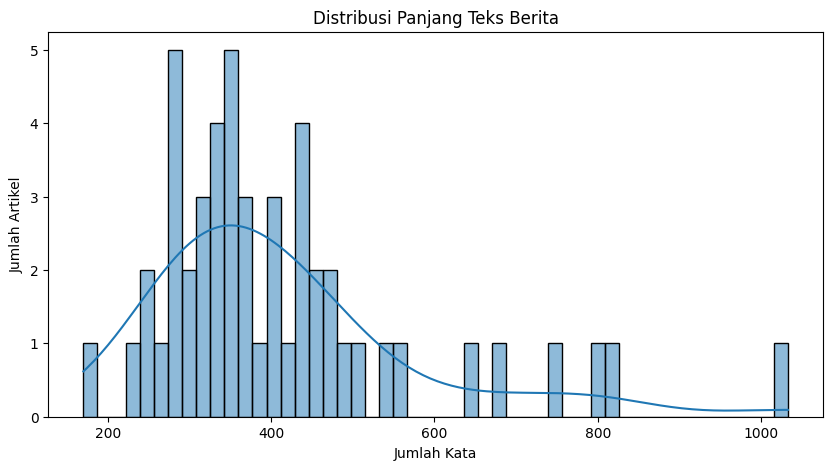

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['content_length'], bins=50, kde=True)
plt.title("Distribusi Panjang Teks Berita")
plt.xlabel("Jumlah Kata")
plt.ylabel("Jumlah Artikel")
plt.show()


Jumlah berita per sumber:
 source
tempo    50
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_22144\4163127188.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')


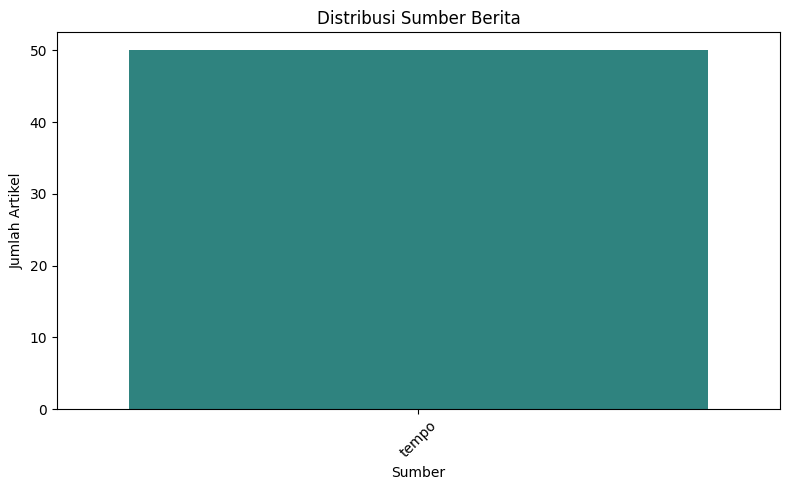

In [22]:
source_counts = df['source'].value_counts()

print("Jumlah berita per sumber:\n", source_counts)

plt.figure(figsize=(8, 5))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='viridis')
plt.title('Distribusi Sumber Berita')
plt.xlabel('Sumber')
plt.ylabel('Jumlah Artikel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

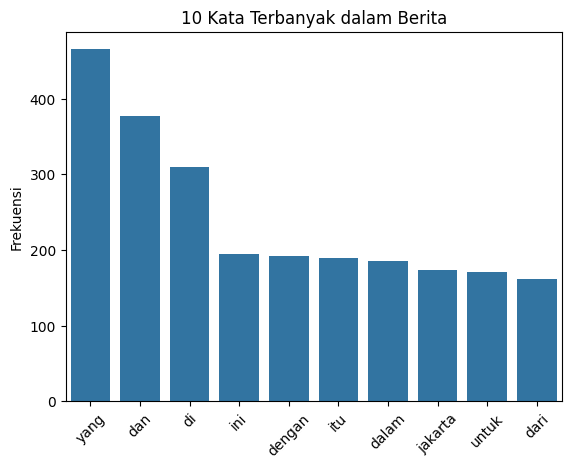

In [23]:
from collections import Counter
import re

all_words = ' '.join(df['content'].dropna()).lower()
all_words = re.findall(r'\b\w+\b', all_words)

word_freq = Counter(all_words).most_common(10)

words, counts = zip(*word_freq)
sns.barplot(x=list(words), y=list(counts))
plt.title("10 Kata Terbanyak dalam Berita")
plt.ylabel("Frekuensi")
plt.xticks(rotation=45)
plt.show()

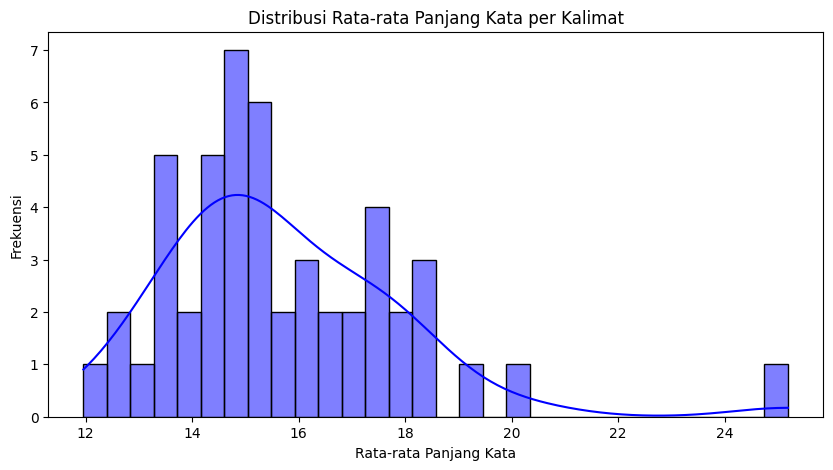

In [24]:
def calculate_words_per_sentence(text):
    sentences = re.split(r'[.!?]', text) 
    sentences = [sentence.strip() for sentence in sentences if sentence.strip()] 
    words_per_sentence = [len(sentence.split()) for sentence in sentences]  
    return words_per_sentence

df['words_per_sentence'] = df['content'].apply(lambda x: calculate_words_per_sentence(str(x)))

df['avg_words_per_sentence'] = df['words_per_sentence'].apply(lambda x: sum(x) / len(x) if x else 0)

plt.figure(figsize=(10, 5))
sns.histplot(df['avg_words_per_sentence'], bins=30, kde=True, color='blue')
plt.title("Distribusi Rata-rata Panjang Kata per Kalimat")
plt.xlabel("Rata-rata Panjang Kata")
plt.ylabel("Frekuensi")
plt.show()

# Preprocessing

In [25]:
!pip install sastrawi


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from nltk.tokenize import RegexpTokenizer

In [27]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('indonesian'))
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [33]:
additional_stopwords = {"tempo", "co", "info", "nasional", "cnbc", "CNBC", "indonesia"}
stop_words.update(additional_stopwords)

def preprocess_sentence(sentence):
    # Case folding
    sentence = sentence.lower()
    # Tokenisasi
    tokens = word_tokenize(sentence)
    # Stopword removal
    tokens = [word for word in tokens if word not in stop_words]
    # Stemming
    tokens = [stemmer.stem(word) for word in tokens]
    return " ".join(tokens)

In [34]:
def split_and_preprocess(text):
    sentences = sent_tokenize(text)  
    original_sentences = sentences  
    processed_sentences = [preprocess_sentence(sentence) for sentence in sentences]  # Versi preprocessing
    return pd.DataFrame({
        'original_sentence': original_sentences,
        'processed_sentence': processed_sentences
    })

In [35]:
all_sentences = []
for idx, row in df.iterrows():
    if pd.notnull(row['content']):
        sentences_df = split_and_preprocess(row['content'])
        sentences_df['document_id'] = idx 
        all_sentences.append(sentences_df)

all_sentences_df = pd.concat(all_sentences, ignore_index=True)


In [36]:
all_sentences_df.to_csv("data/preprocessed_sentences.csv", index=False)

print(all_sentences_df.head())

                                   original_sentence  \
0  TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...   
1  "Turut berbela sungkawa terhadap masyarakat si...   
2  Pertamina harus tanggung jawab," kata dia dala...   
3  TBBM Plumpang dinilai sebagai salah satu termi...   
4  "Plumpang menyuplai sekitar 20 persen kebutuha...   

                                  processed_sentence  document_id  
0  tempo co  jakarta - anggota komisi vii dpr ri ...            0  
1   bela sungkawa masyarakat sipil dampak  daerah...            0  
2  pertamina tanggung   terang jakarta sabtu  4 m...            0  
3  tbbm plumpang nilai salah terminal bbm penting...            0  
4   plumpang suplai 20 persen butuh bbm hari  25 ...            0  


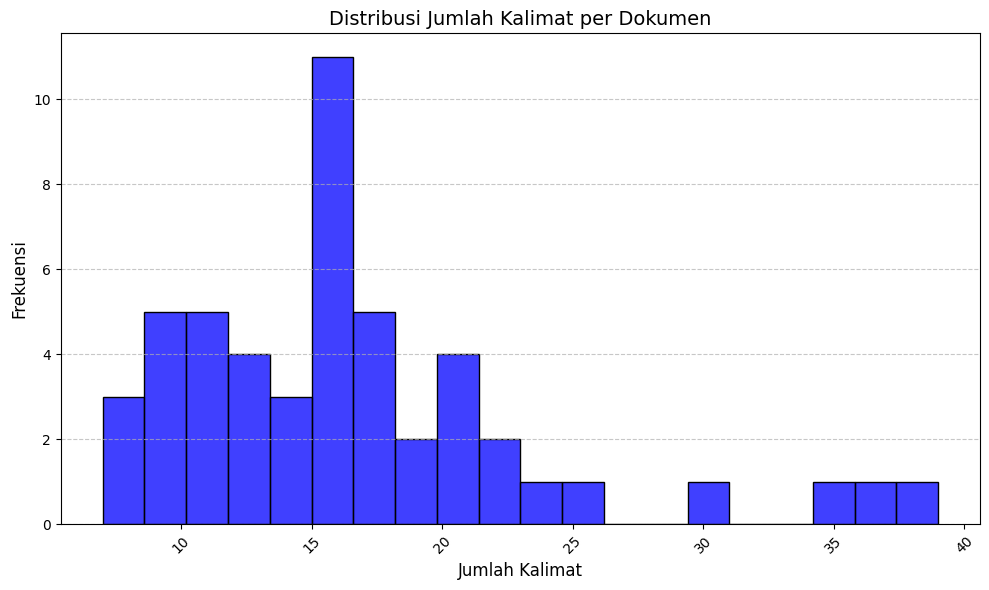

In [37]:
sentence_counts = all_sentences_df['document_id'].value_counts()

plt.figure(figsize=(10, 6))
sns.histplot(sentence_counts, bins=20, kde=False, color='blue')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Distribusi Jumlah Kalimat per Dokumen", fontsize=14)
plt.xlabel("Jumlah Kalimat", fontsize=12)
plt.ylabel("Frekuensi", fontsize=12)
plt.tight_layout()
plt.show()

In [39]:
from IPython.display import display

display(all_sentences_df.head(50))  

,original_sentence,processed_sentence,document_id
0,"TEMPO.CO, Jakarta - Anggota Komisi VII DPR RI ...",tempo co jakarta - anggota komisi vii dpr ri ...,0
1,"""Turut berbela sungkawa terhadap masyarakat si...",bela sungkawa masyarakat sipil dampak daerah...,0
2,"Pertamina harus tanggung jawab,"" kata dia dala...",pertamina tanggung terang jakarta sabtu 4 m...,0
3,TBBM Plumpang dinilai sebagai salah satu termi...,tbbm plumpang nilai salah terminal bbm penting...,0
4,"""Plumpang menyuplai sekitar 20 persen kebutuha...",plumpang suplai 20 persen butuh bbm hari 25 ...,0
5,Maka tindakan selanjutnya adalah bagaimana mem...,tindak suplai bbm ganggu kata rofik singgung...,0
6,"Terhitung 2 tahun terakhir ini, kata dia, suda...",hitung 2 5 fasilitas migas milik pertamina a...,0
7,"""Menyayangkan terjadinya musibah kebakaran ini...",sayang musibah bakar insiden bakar kali fasi...,0
8,Pertamina harus benahi sistem pengamanan dan S...,pertamina benah sistem aman sop dia rofik ha...,0
9,Menurutnya pembenahan diperlukan agar Pertamin...,turut benah pertamina abai aspek aman fasilita...,0
